# **Tarea 4**

Integrantes:
- Vicente González
- Joel Suárez

# Definiciones Básicas

Clustering (Definir que es clustering): Clustering desde una perspectiva simple es agrupar, en machine learning los algoritmos de clustering lo que buscan es agrupar elementos y/o conjuntos de elementos en función de su similitud, entiéndase, los elementos de un mismo cluster deben tener una alta similitud, en tanto, sus características deben tener alguna correlación muy marcada, mientras que, intercluster la similitud debe ser disminuida. Clustering utiliza modelos de aprendizaje no supervisado y es muy popular en la industria. La mayoría de los algoritmos de clustering utilizan métricas de distancia.

---

Explique las diferencias entre el agrupamiento jerárquico aglomerativo y divisivo (Explicar la diferencia es reportar una cualidad o características que hace que un método sea diferente a otro): El agrupamiento jerárquico aglomerativo parte de la premisa que cada elemento en el espacio es su propio cluster en sí, y luego los va juntando en función de alguna métrica (con frecuencia distancia euclidiana) y por tanto, el número de cluster en cada iteración va disminuyendo, ya que, tal y como indica su nombre, los va aglomerando. Si este algoritmo llega hasta el final se tiene un sólo cluster que agrupa a todos los elementos. Es posible visualizar los resultados ya sea a través de un gráfico del espacio (iterativo) o de un dendograma que muestre todo su procedimiento lógico de una vez. El agrupamiento jerárquico divisivo funciona muy similar al aglomerativo, pero este tiene como paradigma inicial que se tiene un cluster que agrupa todo y luego los va separando. Por tanto, trabaja en base a disimilitud.

---

Explique en que consiste el algoritmo K-means y mencione el proceso de inicialización de kmeans++ (En esta sección los estudiantes podrían apoyarse en información de libros, artículos científicos y material de clase): El algoritmo K-means es no supervisado que se basa en realizar un agrupamiento en base a ciertas características de los datos y la correlación existente entre ellos, para esto, el algoritmo lo que hace es generar k centroides (que son los respectivos centros de los agrupamientos) y luego asigna los objetos en función de que centroide es el que tiene más cerca, luego iterativamente busca las posiciones idóneas hasta encontrar el mejor agrupamiento, esto lo hace variando la posición del centroide y se establecen los cluster.
 
Inicialización de kmeans++: Se inicializa con centroides aleatorios y en función de k luego en cada iteración se va moviendo proporcionalmente a la distancia euclidiana, se repite el mismo paso las veces que se consideren necesarias en el algoritmo. Este algoritmo es una forma inteligente de inicializar un kmeans, el punto más lejano al centroide en cada iteración, será el nuevo centroide, lo que genera iteraciones muy eficientes.

---

Explique brevemente las métricas completeness, homogeneity, v-measure, y silhoutte:
 
Completeness: Esta métrica busca crear una relación entre los cluster y la existencia de clases, entiéndase, si los elementos tienen clases previamente asignadas, es lógico pensar que un algoritmo de cluster que funcione bien las termine agrupando en función de sus clases, por tanto, se genera una relación matemática que nos dice que tan bien se realizó esa conexión. Su fórmula viene entregada por la siguiente expresión: $$c=1-\frac{H(Y_{pred}|Y_{true})}{H(Y_{pred})}$$

Homogeneity: Métrica complementaria a completeness que busca comprobar si el algoritmo de agrupación cumple con haber asignado dentro del mismo cluster a los elementos de la misma clase. Su fórmula viene dada por: $$h=1-\frac{H(Y_{true}|Y_{pred})}{H(Y_{true})}$$

V_measure: Se define como la media armónica entre completeness y homogeneity. Su formula viene dada con la siguiente estructura (donde b es beta, h homogeneity y c completeness:
$$v = (1+b)*{hc}/(bh+c)$$

Silhouette: Esta métrica hace relación a cada objeto y que tan similar es el con sus coclusteres, o sea que tan parecido sea a los demás del mismo agrupamiento, va de -1 a 1 donde -1 es muy dispar y 1 extremadamente similar o igual.

---

# Ejercicio de Aplicación

Como es costumbre, comenzamos por importar las librerías necesarias para desarrollar el resto de este trabajo. Como la temática de esta ocasión será clustering, tal como pudimos ver en el marco teórico anterior, la librería `sklearn.cluster` será vital en el desarrollo de este estudio.

In [ ]:
import time as tm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sms
import sklearn.cluster as skc
import sklearn.metrics as skm
import sklearn.preprocessing as skp

Como la base de datos a utilizar en este caso es bastante más grande que las anteriores, se requirió de dividir el conjunto en varios archivos `.csv`.

A continuación se adquieren los archivos necesarios del repositorio utilizado en instancias anteriores, y se acoplan para formar la base de datos original. Esta quedará separada de inmediato en el conjunto de atributos (`WEATHER_X`) y las clases asociadas a cada una de las entradas. (`WEATHER_Y`)

Podemos observar en el `DataFrame` obtenido, que se nos entregó una muestra de 10000 datos del total de la investigación que tiene por contexto este trabajo.

In [ ]:
REPO = "https://raw.githubusercontent.com/Vicente-G/data-mining/main/weather/"
SEED = 8463742
WEATHER_X = pd.read_csv(REPO + "attr_1.csv", engine = "python", sep = ", ")
for i in range(2, 5):
    aux = pd.read_csv(REPO + f"attr_{i}.csv", engine = "python", sep = ", ")
    WEATHER_X = WEATHER_X.append(aux, ignore_index = True)
WEATHER_Y = pd.read_csv(REPO + "class.csv")
WEATHER_X.tail()

,0,1,2,3,4,5,6,7,8,9,...,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502
9995,333.08,328.88,335.21,307.17,156.67,281.79,0.04,0.50,0.04,0.00,...,67.16,61.41,57.53,56.970,56.41,5,1037,"""""""NC""""""",2003,107
9996,348.04,0.17,348.96,307.96,103.13,105.54,370.96,352.42,76.21,139.92,...,56.03,54.36,60.31,56.080,51.85,6,2465,"""""""AR""""""",2009,103
9997,290.54,208.79,0.00,189.50,278.79,0.21,24.38,162.96,320.17,0.88,...,51.22,51.95,52.33,54.260,56.19,3,4499,"""""""OH""""""",2009,157
9998,350.63,358.17,346.96,352.42,181.96,210.50,337.46,371.17,102.96,0.00,...,69.58,71.47,71.28,63.670,56.06,5,689,"""""""KS""""""",2004,81
9999,331.00,67.63,0.21,33.42,339.54,0.04,103.63,143.83,49.17,359.25,...,54.47,57.91,62.77,68.175,73.58,5,1465,"""""""AR""""""",2003,116


En el resultado anterior, los nombres de las columnas asociados a cada atributo solo son números, lo que por supuesto no coincide con la información proporcionada por el enunciado.

Los primeros 1498 atributos, se refieren al reporte de datos metereológicos diarios de la temporada de cultivo, que consistió en 214 días, desde el 1 de abril al 31 de octubre del año de cada investigación. Cada reporte agregaba 7 mediciones meteorológicas, lo que nos da el total de 1498 métricas en distintos días. Las métricas observadas eran las siguientes:

* Irradiancia Normal Directa Promedio (ADNI)
* Precipitación Promedio (AP)
* Humedad Relativa Promedio (ARH)
* Máxima Irradiación Normal Directa (MDNI)
* Temperatura superficial máxima (MaxSur)
* Temperatura superficial mínima (MinSur)
* Temperatura superficial promedio (AvgSur)

Ahora bien, los 5 atributos restantes, corresponden a datos de la misma entrada, puesto que funcionan como identificador de a que lugar, en que año y bajo que condiciones están medidos los datos. Los 5 atributos serían:

* Grupo de madurez (MG)
* ID de genotipo (GID)
* Estado
* Año
* Ubicación

Como estos 5 últimos operan como un identificador de la entrada, similar a un índice de un `DataFrame`, decidimos descartarlos, ya que podrían afectar en la estimación, generando resultados que luego interfieran en la clasificación efectiva con un nuevo conjunto de datos. Ahora pasamos a corregir el `DataFrame`.

In [ ]:
cols = []
metrics = ["ADNI", "AP", "ARH", "MDNI", "MaxSur", "MinSur", "AvgSur"]
registers = ["MG", "GID", "Estate", "Year", "Place"]
for i in range(1, 215):
    cols = cols + [f"{x}_{i}" for x in metrics]
cols = cols + registers
WEATHER_X.columns = cols
FIXED_X = WEATHER_X.drop(columns = registers)
FIXED_X.describe()

,ADNI_1,AP_1,ARH_1,MDNI_1,MaxSur_1,MinSur_1,AvgSur_1,ADNI_2,AP_2,ARH_2,...,MaxSur_213,MinSur_213,AvgSur_213,ADNI_214,AP_214,ARH_214,MDNI_214,MaxSur_214,MinSur_214,AvgSur_214
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,202.419587,210.358122,195.760161,217.045859,221.897353,188.038495,174.338463,197.174144,219.200665,209.614981,...,54.713545,53.650764,53.169000,53.118075,52.746667,51.516862,50.761870,50.434198,51.287627,52.141056
std,133.503662,132.475078,135.647816,140.157571,131.301407,135.786670,139.905485,140.680783,134.828971,140.569567,...,10.006449,10.489262,10.103398,9.680206,9.458849,9.842561,9.551463,9.218528,7.959718,9.315891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29.830000,29.810000,31.910000,33.670000,29.040000,28.610000,27.050000,27.960000,30.560000,25.480000
25%,63.080000,78.170000,47.460000,59.460000,96.040000,40.290000,28.790000,52.330000,87.345000,58.920000,...,47.750000,45.930000,45.770000,45.977500,46.160000,44.660000,44.050000,43.880000,45.865000,46.050000
50%,241.540000,247.170000,222.170000,277.710000,273.250000,204.315000,154.330000,211.040000,254.170000,248.000000,...,54.810000,53.980000,52.600000,51.680000,51.540000,50.350000,49.540000,48.980000,50.965000,52.920000
75%,329.750000,332.040000,329.290000,344.580000,339.540000,325.790000,323.750000,341.670000,346.040000,344.710000,...,62.700000,61.200000,59.930000,60.580000,58.600000,57.420000,56.890000,56.330000,56.265000,57.960000
max,380.380000,381.670000,385.670000,381.750000,389.380000,394.000000,391.750000,399.540000,401.540000,401.210000,...,78.630000,76.970000,76.240000,75.840000,77.230000,79.500000,78.380000,77.350000,74.810000,76.520000


Ya corregido el `DataFrame`, y a pedido del enunciado, procedemos a definir una función que evalúe métricas de interés para el estudio de clustering. Además, decidimos probar su funcionamiento con 4 clusters, ya que el conjunto de datos originalemente clasifica estos valores en 4 clases.

In [ ]:
def evaluate_clustering(estimator, X, y, est_name = "K-Means"):
    ini = tm.time()
    est = estimator.fit(X)
    end = tm.time()
    pred = est.labels_
    metrics = {
        "Completeness": [skm.completeness_score(y, pred)],
        "Homogeneity": [skm.homogeneity_score(y, pred)],
        "V-Measure": [skm.v_measure_score(y, pred)],
        "Silhouette": [skm.silhouette_score(X, pred, random_state = SEED)],
        "Inertia": [None if est_name != "K-Means" else est.inertia_],
        "Convergence Time": [end - ini]
    }
    return pd.DataFrame(metrics, index = [est_name])

FIXED_Y = np.array(WEATHER_Y["categoria"])
n = np.unique(FIXED_Y).shape[0]
km = skc.KMeans(n_clusters = n, random_state = SEED)
ag = skc.AgglomerativeClustering(n_clusters = n, linkage = "single")

m_km = evaluate_clustering(km, FIXED_X, FIXED_Y)
m_ag = evaluate_clustering(ag, FIXED_X, FIXED_Y, est_name = "Agglomerative")

m_km.append(m_ag)

,Completeness,Homogeneity,V-Measure,Silhouette,Inertia,Convergence Time
K-Means,0.006533,0.009732,0.007818,0.046737,1.783204e+11,7.565318
Agglomerative,0.039899,0.002577,0.004842,0.093824,NaN,123.031415


Podemos ver que los valores tienen sentido y son esperables en función
de lo que conocemos de los algoritmos en cuestión, además, si bien es
cierto que jerárquico es mejor en algunos aspectos, dado el volumen de 
datos con el que estamos trabajando la intuición primaria nos indica que 
k means debería ser mejor, de todas maneras, ambos algoritmos hicieron 
separaciones de elementos de iguales características como se podía esperar
de tantas iteraciones, lo que nos da resultados menores en las métricas.
Respecto a Inertia, ya que tiene relación directa con SSE tiene sentido
que sólo aplique para K-Means, dada su naturaleza de inicio aleatorio,
disimil al inicio conocido para jerárquico sea aglomerativo o divisivo.
Respecto al tiempo de convergencia podemos decir que nos hace sentido la 
situación, ya que K-Means trabaja con grandes grupos mientras que jerárquico
tiene una mecánica más lenta y de más iteraciones, por tanto viene de
perogrullo que su tiempo sea considerablemente más abultado.

Igualmente, determinamos que esta es una prueba algo sencilla para un dataset de tales dimensiones, así que en el siguiente apartado realizaremos un análisis en profundidad de ambos métodos.

---


# Desarrollo y análisis

Tomando en cuenta los métodos de clustering empleados en el apartado anterior, así como sus resultados, comenzamos por profundizar el análisis de KMeans. Para ello, definimos una función que nos permita observar de forma sencilla el comportamiento de la suma de las distancias euclideanas al cuadrado de cada punto con su respectivo centroide (SSE) para distintas de cantidades de clusters, comenzando por supuesto, desde los 4 clusters evaluados anteriormente.

In [ ]:
def sse_plot_helper(x, ys, labels, title = False):
    if title:
        plt.title(f"SSE value with {labels[0]}.")
    else:
        plt.title("SSE value by Number of Clusters.")
    for y, label in zip(ys, labels):
        plt.plot(x, y, label = label)
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE value")
    if not title:
        plt.legend()

def sse_graphs(min_n, max_n, X, num_n = 7, **params):
    nc = list(map(int, np.linspace(min_n, max_n, num_n)))
    nX = skp.scale(X)
    sse, nsse = [], []
    for i in nc:
        clf = skc.KMeans(n_clusters = i, **params).fit(X)
        sse.append(clf.inertia_)
        clf = skc.KMeans(n_clusters = i, **params).fit(nX)
        nsse.append(clf.inertia_)
    plt.figure(figsize = (18, 5))
    plt.subplots_adjust(wspace = 0.2)
    plt.subplot(1, 3, 1)
    sse_plot_helper(nc, [sse], ["Original Data"], title = True)
    plt.subplot(1, 3, 2)
    sse_plot_helper(nc, [sse, nsse], ["Original Data", "Normalized Data"])
    plt.subplot(1, 3, 3)
    sse_plot_helper(nc, [nsse], ["Normalized Data"], title = True)

Para esto, haremos gráficos K vs SSE tanto con los datos originales y normalizados para ver que ocurrirá. Nuestra primera intuición es que los datos
normalizados deberían mejorar (disminuir SSE) ya que, como sabemos,
esto tiene una directa relación con la escala original que pueda tener
una variable con respecto a otra, por lo que la normalización debería 
lograr un uso más uniforme de la información por parte del algoritmo.
También de los gráficos, podremos obtener codos para luego evaluaremos su
desempeño. Bien sabemos que del gráfico podemos obtener la selección de un $k$
en función de que en la siguiente iteración la bajada de SSE sea pequeña
(lo que gráficamente se ve como que en ese tramo hay un movimiento más
parecido a una recta horizontal). Bajo estas hipótesis, aplicamos la prueba:

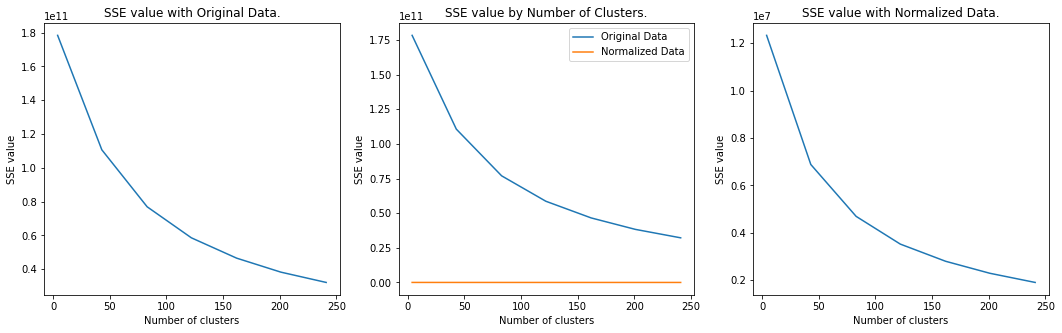

In [ ]:
sse_graphs(4, 241, FIXED_X, random_state = SEED)

Como pudimos ver en los gráficos anteriores, independiente de la normalización, la que genera un impacto positivo en la estimación, el número óptimo de clusters parece estar desde el 2do al 4to punto evaluados, por lo que para terminar el análisis de clustering mediante KMeans, utilizaremos la función que nos permite observar métricas de clusetring definida anteriormente.

In [ ]:
bests = list(map(int, np.linspace(4, 241, 7)[1:4]))
km = skc.KMeans(n_clusters = bests[0], random_state = SEED)
table = evaluate_clustering(km, FIXED_X, FIXED_Y)
table = table.rename(index = {"K-Means" : f"K-Means {bests[0]}"})
for i in range(1, 3):
    km = skc.KMeans(n_clusters = bests[i], random_state = SEED)
    aux = evaluate_clustering(km, FIXED_X, FIXED_Y)
    aux = aux.rename(index = {"K-Means" : f"K-Means {bests[i]}"})
    table = table.append(aux)
table

,Completeness,Homogeneity,V-Measure,Silhouette,Inertia,Convergence Time
K-Means 43,0.021736,0.095760,0.035430,0.197497,1.106377e+11,30.461651
K-Means 83,0.027145,0.141877,0.045571,0.300087,7.693841e+10,42.385176
K-Means 122,0.034064,0.194087,0.057956,0.368792,5.860176e+10,58.193271


Podemos ver los codos y llegamos a la conclusión de que los 3 son bastante
buenos. No obstante, podemos ver que mientras más grande es $k$ más tiempo toman, lo que se traduce en mayor costo computacional. Para nuestro ejercicio
puede no ser mayor problema (apenas 1 minuto) pero pensando en conjuntos
más grandes podría ser algo a tener en consideración.

Teniendo esto en cuenta consideramos que `n_clusters = 43` es bastante costo-eficiente, pero lógicamente tener un $k$ mayor disminuye los errores (en efecto de la tendencia de que los elementos son más cercanos a su centro al haber más grupos).

---

Ahora bien, ya analizado el comportamiento de `KMeans` con este conjunto de datos, pasamos a revisar la estrategia jerárquica con el método `AgglomerativeClustering`. Pero antes, hagamos un repaso rápido de los distintos parámetros que esta función recibe.

La afinidad (`affinity`) que se utiliza en los algoritmos de clustering jerárquico
aglomerativo hace referencia a una métrica que consigue agrupar los objetos,
por ejemplo: distancia euclidiana, distancia Manhattan, entre otros.

El parámetro `distance_threshold` hace referencia al máximo de la métrica que se considerará para la unión de los cluster, por ejemplo: si algún elemento supera esa distancia entonces no será considerado para la siguiente iteración y terminará el algoritmo.

Esto está profundamente relacionado con el tipo de `linkage` que se emplee, los cuales a su vez pueden tomar el valor de `"single"` que considera los elementos más cercanos, `"average"` que utiliza la media de los puntos, entre otros.

En la prueba sobre este método, aprovecharemos los $k$ obtenidos en la etapa anterior, para hacer una comparación justa entre métodos. Adicionalmente, emplearemos diferentes estrategias sobre que distancia elegir, bajo la variación del parámetro `linkage`, con los 2 valores mencionados anteriormente.

In [ ]:
def agg_table(array_n, X, y):
    aggs = []
    for i in array_n:
        for j in ["single", "average"]:
            aggs.append(skc.AgglomerativeClustering(n_clusters = i, linkage = j))
    names = []
    for i in array_n:
        for j in ["single", "average"]:
            names.append(f"Agg {i}-{j}")
    table = evaluate_clustering(aggs[0], X, y, est_name = names[0])
    for i in range(1, len(aggs)):
        aux = evaluate_clustering(aggs[i], X, y, est_name = names[i])
        table = table.append(aux)

agg_table(bests, FIXED_X, FIXED_Y)

,Completeness,Homogeneity,V-Measure,Silhouette,Inertia,Convergence Time
Agg 43-single,0.018902,0.052693,0.027823,0.071863,None,127.958333
Agg 43-average,0.021716,0.058909,0.031734,0.151799,None,74.246945
Agg 83-single,0.021757,0.090463,0.035078,0.142964,None,121.350938
Agg 83-average,0.025153,0.120963,0.041646,0.273887,None,74.178691
Agg 122-single,0.026847,0.124877,0.044193,0.197034,None,121.141821
Agg 122-average,0.031584,0.172459,0.053390,0.348492,None,74.280391


Ante esta evaluación que apuntaba a ser más justa entre ambos estimadores, nos encontramos con lo que parecía ser una sorpresa, ya que ninguna de las configuraciones logró superar los valores obtenidos por la primera configuración de 4 clusters. Ante ello, optamos por realizar una segunda prueba con múltiplos de 4, por 2 razones, la primera intuición, es que el estimador funcionará mejor de forma consistente con cantidades menores de clusters, y la segunda, que podría tratarse de alguna dependencia que exista en el conjunto de datos con relación a la ya conocida división marcada por la clase del conjunto.

In [ ]:
agg_table([4, 8, 16], FIXED_X, FIXED_Y)

,Completeness,Homogeneity,V-Measure,Silhouette,Inertia,Convergence Time
Agg 4-single,0.039899,0.002577,0.004842,0.093824,None,123.881942
Agg 4-average,0.029283,0.002685,0.004919,0.104132,None,77.171603
Agg 8-single,0.036380,0.006103,0.010452,0.075189,None,125.162407
Agg 8-average,0.014710,0.006114,0.008638,0.082396,None,76.207853
Agg 16-single,0.018893,0.010920,0.013840,0.044896,None,122.980475
Agg 16-average,0.021863,0.013956,0.017037,0.069744,None,75.415533


Con este último experimento podemos descartar definitivamente la dependencia mencionada anteriormente, lo que es una pena, ya que esto hubiera significado una posibilidad de mejorar la estimación explotando eso.

Ahora bien, podemos notar que no se trata tanto así como de una anomalía con respecto a que los puntajes alcanzados por `n_clusters = 4` sean buenos, ya que con el mismo parámetro en 8, se obtienen resultados relativamente cercanos, lo que implicaría que el estimador (o al menos su implementación) opera de mejor manera con cantidades de clusters más leves.

# Conclusiones

Podemos ver que tanto los métodos jerárquicos como el particional 'K-Means' son algoritmos muy potentes y que trabajan con repositorios muy grandes de datos, en específico, no habíamos trabajado con volúmenes tan abultados de datos y los tiempos de cómputo requeridos no fueron bajo ningún concepto inmanejables.

De la parte teórica pudimos aprender la correlación matemática existente entre lo que se sabe de los clústeres y las expectativas a nivel humano de estos algoritmos, cosa que a priori es muy difícil obtener. Además nos asombramos con la investigación, ya que, vimos ejemplos de estos algoritmos tratando de entender, por ejemplo, lenguajes que ya no se utilizan y/o jeroglíficos que dificilmente podríamos deducir con nuestros paradigmas mentales iniciales.

De observar el resultado del último apartado del código, y compararlo con el obtenido para el método `KMeans`, determinamos que para este conjunto de datos el algoritmo a seleccionar va tener una fuerte correlación con lo que se busque obtener. Como vimos en el último apartado 'agglomerative' da resultados peores que 'K-Means' a partir de cierta cantidad de clústeres. No obstante con una cantidad pequeña de grupos 'agglomerative' funciona mejor en base a las métricas, a costo de un mayor tiempo de cómputo. Por lo que a esto, podemos decir que el método a elegir depende muy fuertemente de lo que quien implemente busque recibir de los datos.

# Referencias

### Teóricas:

[Artículo original del conjunto de datos](https://eval.ai/web/challenges/challenge-page/1251/overview)

---

### Sobre implementación:

[Primer Método de Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

[Segundo Método de Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglom#sklearn.cluster.AgglomerativeClustering)

In [1]:
%%shell
jupyter nbconvert --to html /content/TAREA_4.ipynb

[NbConvertApp] Converting notebook /content/TAREA_4.ipynb to html
[NbConvertApp] Writing 401264 bytes to /content/TAREA_4.html
